# About:
- this notebook:
    - performs feature selection using feature importance approach
        - **remove least important features individually to see if that improves generalisation by reducing complexity**

- insights:
    - **no promising improvments found**

### prepare data

In [1]:
dataset = pd.read_csv(r"C:\Users\tanch\Documents\Coding Competitions\DataDriven\Flu Shot Learning\local\data\cleaned_train_set.csv",index_col = "respondent_id")

<IPython.core.display.Javascript object>

In [2]:
label_colnames = ['h1n1_vaccine', 'seasonal_vaccine']
feature_colnames = [col for col in dataset.columns if col not in label_colnames]
X=dataset[feature_colnames]
y1=dataset[label_colnames[0]]
y2=dataset[label_colnames[1]]

### fit models

In [3]:
from catboost import CatBoostClassifier
param = {
    "learning_rate" : 0.01,
    "iterations" :  3000,
    'depth': 4, 
    'rsm': 0.2680717988907101, 
    'l2_leaf_reg': 5.087316180296697, 
    'auto_class_weights': 'Balanced',
    "loss_function" : "Logloss",
    "verbose":False,
    "task_type" : "CPU",
    "eval_metric":"AUC"
}
cb = CatBoostClassifier()
cb.set_params(**param)

In [4]:
from xgboost import XGBClassifier
param = {
    "n_estimators" : 1560,
    'learning_rate': 0.012906144911477856,
    'max_depth': 5,
    'reg_alpha': 5,
    'reg_lambda': 0,
    'min_child_weight': 2,
    'gamma': 0,
    'colsample_bytree': 0.23,
    'subsample': 0.98,
    'eval_metric': 'auc'}
xgb = XGBClassifier()
xgb.set_params(**param)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.23, eval_metric='auc',
              gamma=0, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.012906144911477856,
              max_delta_step=None, max_depth=5, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=1560, n_jobs=None,
              num_parallel_tree=None, random_state=None, reg_alpha=5,
              reg_lambda=0, scale_pos_weight=None, subsample=0.98,
              tree_method=None, validate_parameters=None, verbosity=None)

In [5]:
from lightgbm import LGBMClassifier
param = {
"learning_rate":0.05 ,
"max_depth" : 4,
"colsample_bytree" :0.8,
"subsample" :0.8,
#'objective': 'binary',
"metric" :'auc',
"n_estimators" : 1000
}
lgb = LGBMClassifier().set_params(**param)
lgb.set_params(**param)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               metric='auc', n_estimators=1000, subsample=0.8)

In [6]:
cb.fit(X,y1)
xgb.fit(X,y1)
lgb.fit(X,y1)

C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               metric='auc', n_estimators=1000, subsample=0.8)

## Feature Importances - h1n1_vaccine

<IPython.core.display.Javascript object>

<AxesSubplot:>

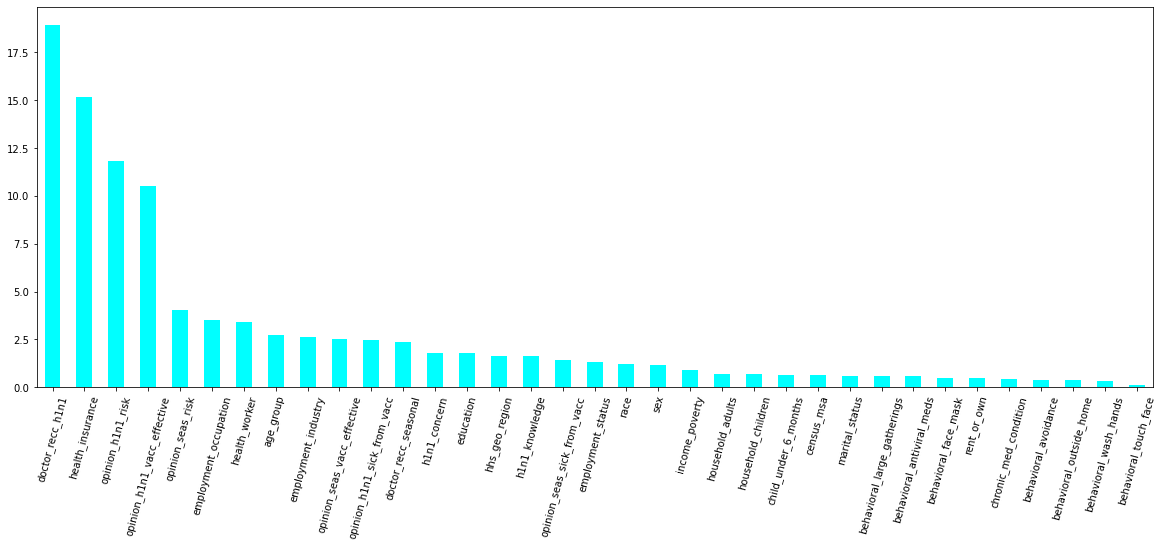

In [7]:
catboost_feature_importances_y1 = pd.Series(dict(zip(cb.feature_names_,cb.get_feature_importance()))).sort_values(ascending = False)
catboost_feature_importances_y1.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))

<IPython.core.display.Javascript object>

<AxesSubplot:>

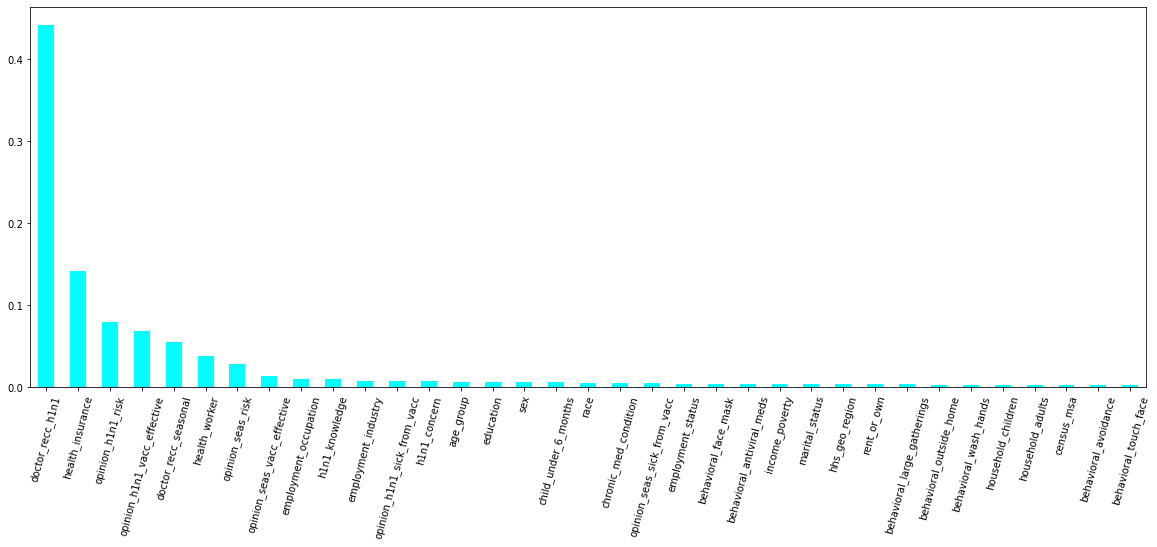

In [8]:
xgb_feature_importances_y1 = pd.Series(dict(zip(X.columns,xgb.feature_importances_))).sort_values(ascending = False)
xgb_feature_importances_y1.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))

<IPython.core.display.Javascript object>

<AxesSubplot:>

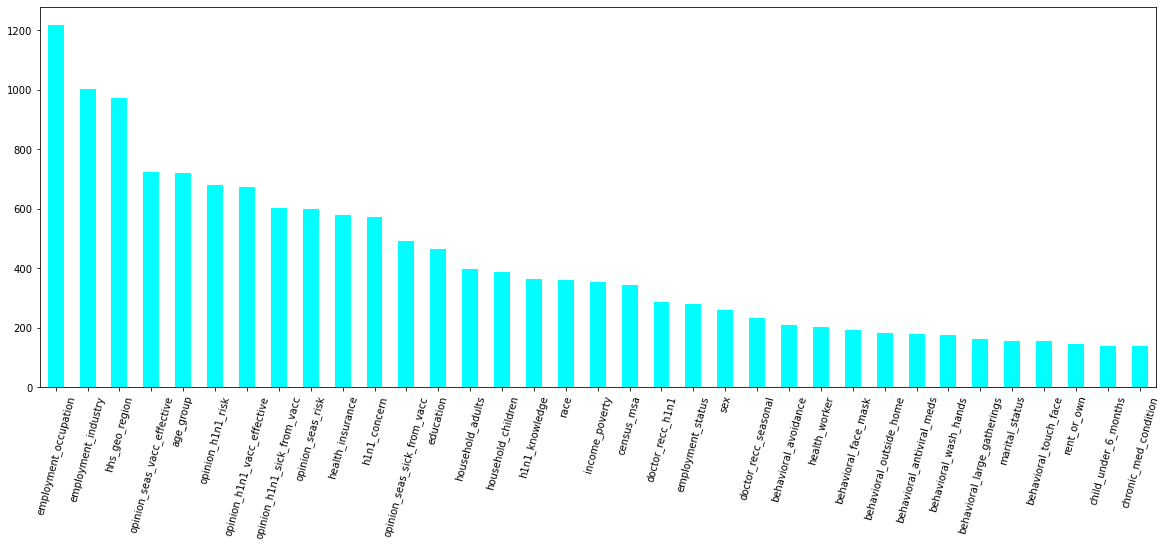

In [9]:
lgb_feature_importances_y1 = pd.Series(dict(zip(X.columns,lgb.feature_importances_))).sort_values(ascending = False)
lgb_feature_importances_y1.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))


## Feature Selection - feature importance approach
- remove the least important features by feature importance 

In [10]:
from collections import defaultdict
scoreboard = defaultdict(list)

In [11]:
from sklearn.model_selection import cross_val_score
worst_features = [""]+list(catboost_feature_importances_y1[::-1][:5].keys())
for col in worst_features:
    temp_X = X.drop(col,errors = "ignore",axis=1)
    for model_name,model in [("cb",cb),("xgb",xgb),("lgb",lgb)]:
        score  =cross_val_score(model, temp_X,y1,scoring = "roc_auc",cv = 4).mean()
        print(score)
        scoreboard[col].append(score)

0.8692587803186356


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8693676646856723
0.8635344394821077
0.8691131906712648


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8693034936016475
0.8635010704768327
0.8691887771167106


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8692184103490386
0.8630988056070674
0.8690867883080419


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8692375759600575
0.8634607650298446
0.8691160645951619


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8692026016465673
0.8639378771848364
0.8690130972283909


C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\tanch\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

0.8691206609650604
0.8639180644269864


## Result
- no improvement in removing any least important features

In [12]:
pd.DataFrame(scoreboard,index =["cb","xgb","lgb"])

<IPython.core.display.Javascript object>

,,behavioral_touch_face,behavioral_wash_hands,behavioral_outside_home,behavioral_avoidance,chronic_med_condition
cb,0.869259,0.869113,0.869189,0.869087,0.869116,0.869013
xgb,0.869368,0.869303,0.869218,0.869238,0.869203,0.869121
lgb,0.863534,0.863501,0.863099,0.863461,0.863938,0.863918


## Feature Importances - seasonal_vaccine

In [19]:
from catboost import CatBoostClassifier
param = {
    "learning_rate" : 0.01,
    "iterations" :  3000,
    'depth': 4, 
    'rsm': 0.2680717988907101, 
    'l2_leaf_reg': 5.087316180296697, 
    'auto_class_weights': 'Balanced',
    "loss_function" : "Logloss",
    "verbose":False,
    "task_type" : "CPU",
    "eval_metric":"AUC"
}
cb = CatBoostClassifier()
cb.set_params(**param)

In [21]:
from xgboost import XGBClassifier
param = {
    "n_estimators" : 1560,
    'learning_rate': 0.012906144911477856,
    'max_depth': 5,
    'reg_alpha': 5,
    'reg_lambda': 0,
    'min_child_weight': 2,
    'gamma': 0,
    'colsample_bytree': 0.23,
    'subsample': 0.98,
    "use_label_encoder":False,
    'eval_metric': 'auc'}
xgb = XGBClassifier()
xgb.set_params(**param)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.23, eval_metric='auc',
              gamma=0, gpu_id=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.012906144911477856,
              max_delta_step=None, max_depth=5, min_child_weight=2, missing=nan,
              monotone_constraints=None, n_estimators=1560, n_jobs=None,
              num_parallel_tree=None, random_state=None, reg_alpha=5,
              reg_lambda=0, scale_pos_weight=None, subsample=0.98,
              tree_method=None, use_label_encoder=False,
              validate_parameters=None, verbosity=None)

In [22]:
from lightgbm import LGBMClassifier
param = {
"learning_rate":0.05 ,
"max_depth" : 4,
"colsample_bytree" :0.8,
"subsample" :0.8,
#'objective': 'binary',
"metric" :'auc',
"n_estimators" : 1000
}
lgb = LGBMClassifier().set_params(**param)
lgb.set_params(**param)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               metric='auc', n_estimators=1000, subsample=0.8)

In [23]:
cb.fit(X,y2)
xgb.fit(X,y2)
lgb.fit(X,y2)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=4,
               metric='auc', n_estimators=1000, subsample=0.8)

<IPython.core.display.Javascript object>

<AxesSubplot:>

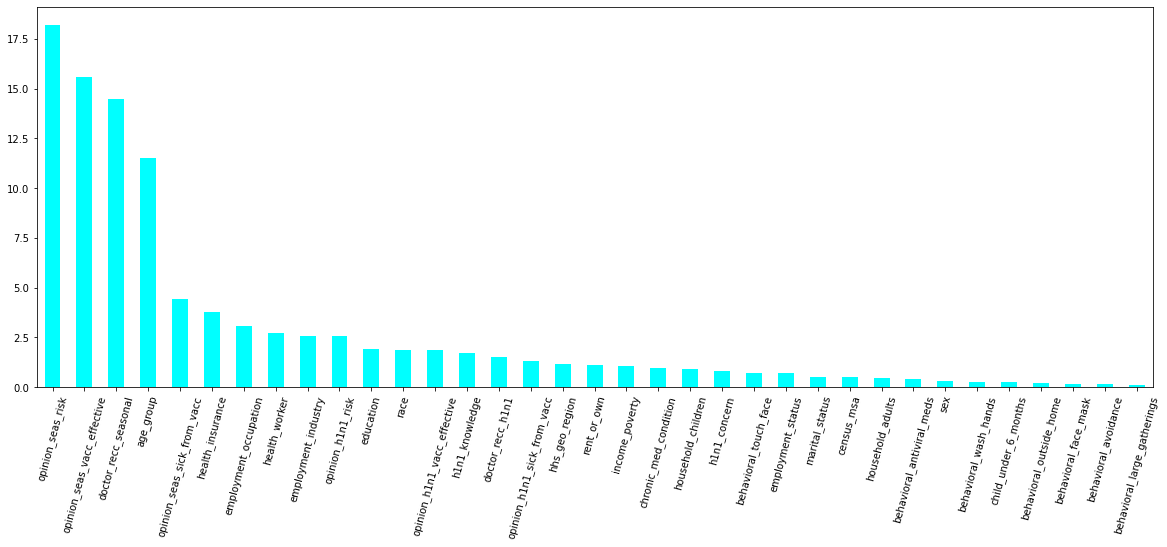

In [24]:
catboost_feature_importances_y2 = pd.Series(dict(zip(cb.feature_names_,cb.get_feature_importance()))).sort_values(ascending = False)
catboost_feature_importances_y2.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))

<IPython.core.display.Javascript object>

<AxesSubplot:>

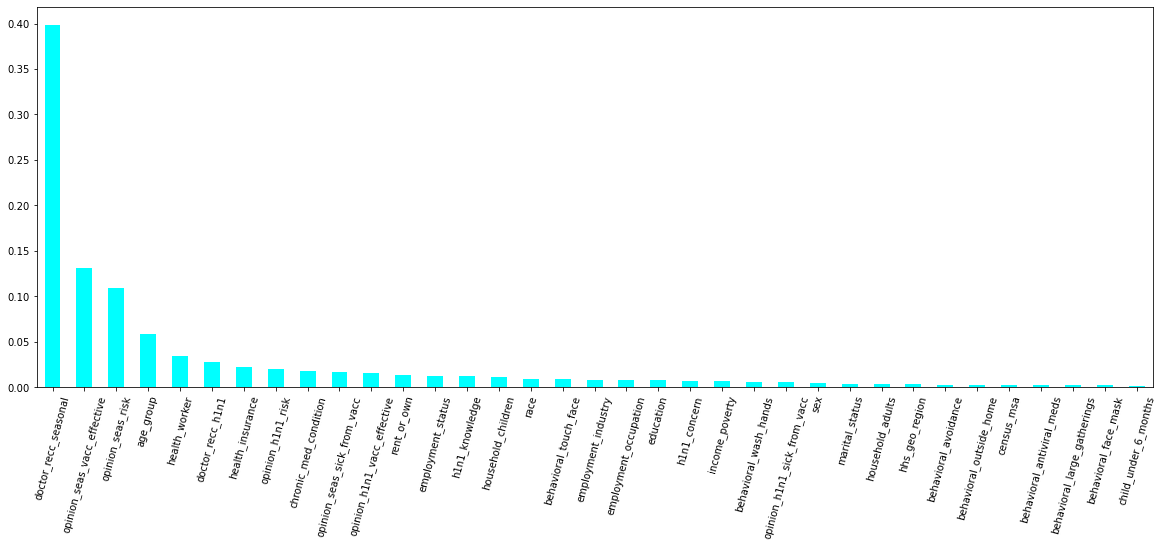

In [25]:
xgb_feature_importances_y2 = pd.Series(dict(zip(X.columns,xgb.feature_importances_))).sort_values(ascending = False)
xgb_feature_importances_y2.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))

<IPython.core.display.Javascript object>

<AxesSubplot:>

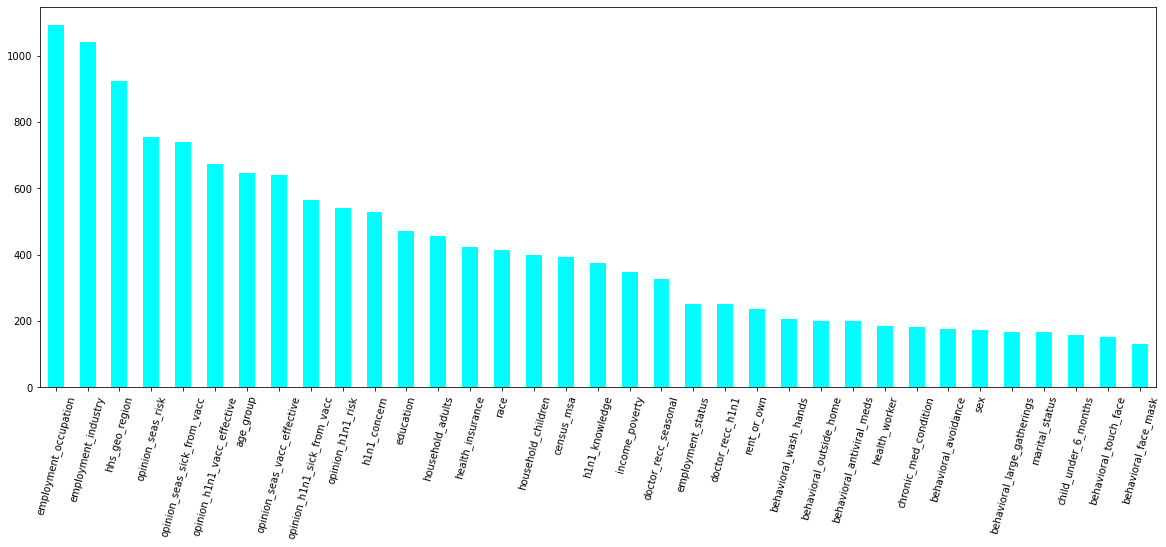

In [26]:
lgb_feature_importances_y2 = pd.Series(dict(zip(X.columns,lgb.feature_importances_))).sort_values(ascending = False)
lgb_feature_importances_y2.plot(kind = "bar", colormap  ="cool",rot = 75,figsize = (20,7))


## Feature Selection - feature importance approach
- remove the least important features by feature importance 

In [49]:
from collections import defaultdict
scoreboard_y2 = defaultdict(list)

In [51]:
from sklearn.model_selection import cross_val_score
worst_features = [""]+list(lgb_feature_importances_y2[-2:].keys())+list(catboost_feature_importances_y2[-2:].keys())+list(xgb_feature_importances_y2[-2:].keys())
for col in worst_features:
    temp_X = X.drop(col,errors = "ignore",axis=1)
    for model_name,model in [("cb",cb),("xgb",xgb),("lgb",lgb)]:
        score  =cross_val_score(model, temp_X,y2,scoring = "roc_auc",cv = 4).mean()
        print(score)
        scoreboard_y2[col].append(score)

0.8643118902829732
0.8648547380861679
0.8602243562862391
0.8640556059610114
0.8644441628228425
0.8601590000052537
0.8643746759418054
0.8647772157258496
0.8603573173114177
0.8643633870219211
0.864777812460976
0.8602739399834766
0.8643069311322888
0.8647653087593881
0.860321607600726
0.8643746759418054
0.8647772157258496
0.8603573173114177
0.8643661667776414
0.8646561808104569
0.860462402270011


## Result
- no improvement in removing any least important features, except lgb

In [80]:
pd.DataFrame(scoreboard_y2,index =["cb","xgb","lgb"])

<IPython.core.display.Javascript object>

,,behavioral_touch_face,behavioral_face_mask,behavioral_avoidance,behavioral_large_gatherings,child_under_6_months
cb,0.864312,0.864056,0.864375,0.864363,0.864307,0.864366
xgb,0.864855,0.864444,0.864777,0.864778,0.864765,0.864656
lgb,0.860224,0.860159,0.860357,0.860274,0.860322,0.860462
